In [1]:
%load_ext autoreload
%autoreload 1
%matplotlib inline


In [2]:
import numpy as np
import pandas as pd
import matplotlib, collections, itertools, os, re, textwrap, logging
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from functools import reduce

from logging.config import dictConfig
from logging import getLogger

dictConfig(dict(
    version = 1,
    formatters = {'f': {'format': '%(asctime)s %(name)-12s %(levelname)-8s %(message)s'}},
    handlers = {
        'h': {'class': 'logging.StreamHandler','formatter': 'f',
              'level': logging.DEBUG}},
    root = {'handlers': ['h'], 'level': logging.DEBUG,},
))

matplotlib.rc('font',**{'size':16, 'family':'sans-serif','sans-serif':['HelveticaNeue', 'Helvetica']})

logger = getLogger('notebook')


In [3]:
import yt_misc_py as yt_misc

import rivas_decomposition_py as decomposition


In [4]:
repo_dir = os.path.dirname(os.path.dirname((os.path.dirname(os.path.realpath(os.getcwd())))))

out_dir = os.path.join(
    repo_dir, 'figs', os.path.basename(os.path.realpath(os.getcwd())),
)


In [5]:
d_PTVs = decomposition.decomposition(os.path.join(
    repo_dir, 'private_data', 'npz', 'dev_PTVsNonMHC_z_center_p0001_100PCs_20180129.npz'
))

d_coding = decomposition.decomposition(os.path.join(
    repo_dir, 'private_data', 'npz', 'dev_codingNonMHC_z_center_p0001_100PCs_20180129.npz'
))

d_all = decomposition.decomposition(os.path.join(
    repo_dir, 'private_data', 'npz', 'dev_allNonMHC_z_center_p0001_100PCs_20180129.npz'
))


2019-02-04 18:45:07,864 data_load_from_npz INFO     reading data from /Users/yosuke/repos/rivas-lab/decomposition/private_data/npz/dev_PTVsNonMHC_z_center_p0001_100PCs_20180129.npz
2019-02-04 18:45:07,977 data_load_from_npz INFO     reading data from /Users/yosuke/repos/rivas-lab/decomposition/private_data/npz/dev_codingNonMHC_z_center_p0001_100PCs_20180129.npz
2019-02-04 18:45:08,682 data_load_from_npz INFO     reading data from /Users/yosuke/repos/rivas-lab/decomposition/private_data/npz/dev_allNonMHC_z_center_p0001_100PCs_20180129.npz


In [6]:
fig_out_dir = os.path.join(
    os.path.dirname(os.path.dirname(os.path.dirname(os.path.realpath(os.getcwd())))), 
    'figs', 
    os.path.basename(os.path.realpath(os.getcwd()))
)


In [7]:
dataset_names = [
    '(1) All variants', '(2) Coding', '(3) PTVs'
]
colors = ['blue', 'black', 'red']
datasets = [d_all, d_coding, d_PTVs]

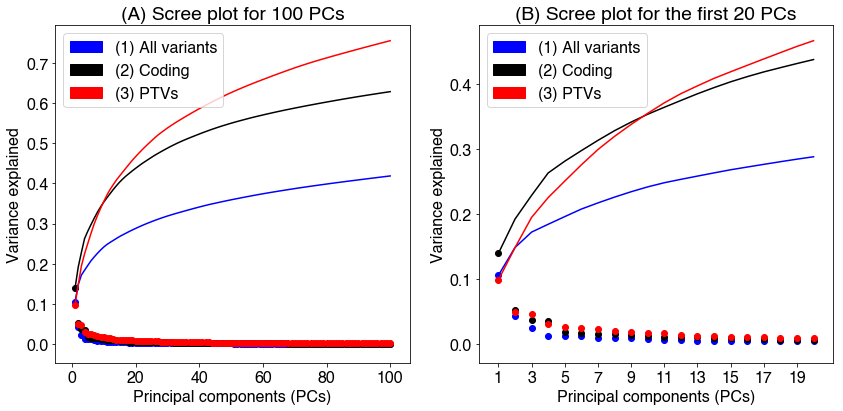

In [11]:
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(1, 2)
fig_axs = [fig.add_subplot(sp) for sp in gs]
for i, d in enumerate(datasets):
    fig_axs[0].scatter(
        range(1, d.d['n_PCs'] + 1),
        d.d['variance_explained'],
        label=dataset_names[i],
        color=colors[i]
    )
    fig_axs[0].plot(
        range(1, d.d['n_PCs'] + 1),
        np.cumsum(d.d['variance_explained']),
        label=dataset_names[i],
        color=colors[i]
    )

for i, d in enumerate(datasets):
    fig_axs[1].scatter(
        range(1, 20 + 1),
        d.d['variance_explained'][:20],
        label=dataset_names[i],
        color=colors[i]
    )
    fig_axs[1].plot(
        range(1, 20 + 1),
        np.cumsum(d.d['variance_explained'][:20]),
        label=dataset_names[i],
        color=colors[i]
    )

fig_axs[0].set_title('(A) Scree plot for 100 PCs')
fig_axs[1].set_title('(B) Scree plot for the first 20 PCs')
fig_axs[0].xaxis.set_ticks(np.arange(0, d.d['n_PCs'] + 1, 20))
fig_axs[1].xaxis.set_ticks(np.arange(0 + 1, 20 + 1, 2))

for ax in fig_axs:    
    ax.set_xlabel('Principal components (PCs)')
    ax.set_ylabel('Variance explained')

    ax.legend(
        handles=[mpatches.Patch(color=colors[i], label=dataset_names[i]) 
                 for i in range(len(dataset_names))]
    )
gs.tight_layout(fig, rect=[0, 0, 1, 1]) 

for ext in ['pdf', 'png']:
    fig.savefig(
        os.path.join(fig_out_dir, 'figS1.{}'.format(ext)),
        bbox_inches="tight", pad_inches=0.0,
    )


In [10]:
for d in datasets:
    print(np.sum(d.d['variance_explained']))

0.418650168846807
0.6284630836718771
0.7552565467770942
